# Pymaceuticals


### *Results and Findings*

1. Based on the sample dataset of 250 mice under 4 treatments (Capomulin, Infubinol, Ketapril, and Placebo), the Ketapril, Infubinol, and Placebo treatments had an increase in tumor volume responses across  45 days. Ketapril has approximately a 47% increase, which is the largest increase in tumor response rate of the four treatments. Capomulin has a reduction in tumor volume response of about 21%.

2. Ketapril treatment has the greatest increase of metastatic spreading sites, slightly greater than when no treatment was given to the mice (placebo). Capomulin has the lowest metastatic spread of the four treatments. 

3. When comparing survival rate, 25 mice were placed in each treatment. Capomulin has highest survival rate, with 21 surviving after the 45 day treatment period. Infubinol has the lowest survival rate, with 9 mice surviving the treatment period.

Based on the data collected from the study above, ** Capomulin ** seems to be the best treatment of the four. Capomulin was the only treatment that shows a ** reduction ** in total tumor volume, has the **lowest metastatic spread**, and the **highest survival rate** across the 45 day period. 


Some limitations of the study that may have affected the results were the small sample size of mice per treatment (n=25). The small sample may have affected the data collected and the results of the treatment. Variables, such as potential side effects of each treatment during and after the 45 treatment period, were not accounted for in the data.


In [1]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem as sem

%matplotlib inline

In [2]:
#read my files

link1=("Resources/mouse_drug_data_copy.csv")
link2=("Resources/clinicaltrial_data_copy.csv")

mouse_drug_csv=pd.read_csv(link1)
clinicaltrial_data_csv=pd.read_csv(link2)

In [3]:
#merge files

merged_df=pd.merge(mouse_drug_csv,clinicaltrial_data_csv,on="Mouse ID",how="outer")
merged_df.head()

# We are only analyzing the effects of Ketapril, Capomulin, Infubinol, and Placebo on the rats
merged_selected_df=merged_df.loc[(merged_df["Drug"] == "Ketapril") | 
                   (merged_df["Drug"]=="Capomulin") | 
                   (merged_df["Drug"]=="Infubinol") |
                   (merged_df["Drug"]=="Placebo")]

### Tumor Volume Response to Treatment

In [4]:
vol_change_df=merged_selected_df.groupby(["Timepoint","Drug"])["Tumor Volume (mm3)"].mean()
vol_change_df.unstack()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [5]:
# add up all the means for each drug, and then calculate the SE for the sample for each time
merged_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
drug4=['Ketapril', 'Capomulin','Infubinol','Placebo']

def tumorvol_mean(drug_name):
    '''Calculates the tumor volume mean for each treatment at each timepoint'''
    df_tumor=merged_selected_df.loc[merged_df["Drug"]==drug_name]
    df_timepoint_mean=df_tumor.groupby("Timepoint")["Tumor Volume (mm3)"].mean().tolist()
    return df_timepoint_mean

def tumorvol_se(drug_name):
    '''Calculates the standard error for each treatment at each timepoint'''
    df_tumor=merged_selected_df.loc[merged_df["Drug"]==drug_name]
    df_tumor_se=df_tumor.groupby("Timepoint")["Tumor Volume (mm3)"].sem().tolist()
    return df_tumor_se

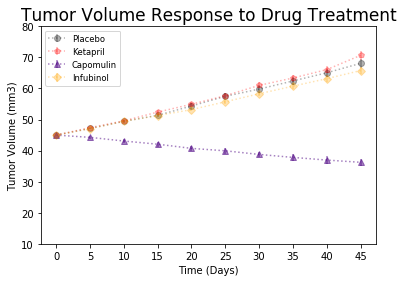

In [7]:
# Ketapril
df_timepoint_mean_k=tumorvol_mean(drug4[0])
df_timepoint_se_k=tumorvol_se(drug4[0])

#Capomulin
df_timepoint_mean_c=tumorvol_mean(drug4[1])
df_timepoint_se_c=tumorvol_se(drug4[1])

# Infubinol
df_timepoint_mean_i=tumorvol_mean(drug4[2])
df_timepoint_se_i=tumorvol_se(drug4[2])

# Placebo
df_timepoint_mean_p=tumorvol_mean(drug4[3])
df_timepoint_se_p=tumorvol_se(drug4[3])


fig, ax = plt.subplots()

#calculate error bars and means
ax.errorbar(np.arange(0,50,5), df_timepoint_mean_p, yerr=df_timepoint_se_p, fmt="o", color="black",alpha=0.3, label="Placebo",linestyle=":")
ax.errorbar(np.arange(0,50,5),df_timepoint_mean_k, yerr=df_timepoint_se_k,fmt="p",color="red",alpha=0.3,label="Ketapril",linestyle =":")
ax.errorbar(np.arange(0,50,5),df_timepoint_mean_c, yerr=df_timepoint_se_c, fmt="^",color="indigo",alpha=0.5,label="Capomulin",linestyle=":")
ax.errorbar(np.arange(0,50,5),df_timepoint_mean_i, yerr=df_timepoint_se_i, fmt="D",color="orange",alpha=0.3,label="Infubinol",linestyle=":")

plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(10,85,10))
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title( "Tumor Volume Response to Drug Treatment",size=17)

### Changes in metastatic (cancer spreading) sites  over time for each treatment

In [8]:
metastic_changes_df=merged_selected_df.groupby(["Timepoint","Drug"])["Metastatic Sites"].mean()
metastic_changes_df.head()

Timepoint  Drug     
0          Capomulin    0.00
           Infubinol    0.00
           Ketapril     0.00
           Placebo      0.00
5          Capomulin    0.16
Name: Metastatic Sites, dtype: float64

In [9]:
metastic_changes_df.unstack()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [10]:
drug4=['Ketapril', 'Capomulin','Infubinol','Placebo']

def drug_mean(drug_name):
    df_metastatic=merged_selected_df.loc[(merged_selected_df["Drug"]==drug_name)]
    df_metastatic_mean=df_metastatic.groupby("Timepoint")["Metastatic Sites"].mean().tolist()
    return df_metastatic_mean

def drug_sem(drug_name):
    df_metastatic=merged_selected_df.loc[(merged_selected_df["Drug"]==drug_name)]
    df_metastatic_se=df_metastatic.groupby("Timepoint")["Metastatic Sites"].sem().tolist()
    return df_metastatic_se



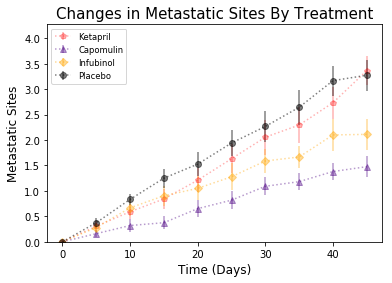

In [11]:
#Ketapril Metastic Spread

k_metastatic_mean=drug_mean(drug4[0])
k_metastatic_se=drug_sem(drug4[0])

#Capomulin Metastic Spread

c_metastatic_mean=drug_mean(drug4[1])
c_metastatic_se=drug_sem(drug4[1]) 

#Infubinol Metastic Spread

i_metastatic_mean=drug_mean(drug4[2])
i_metastatic_se=drug_sem(drug4[2])

#Placebo Metastic Spread

p_metastatic_mean=drug_mean(drug4[3])
p_metastatic_se=drug_sem(drug4[3])

fig, ax = plt.subplots()
ax.errorbar((np.arange(0,50,5)), k_metastatic_mean,yerr=k_metastatic_se,fmt='p',color="r",alpha=0.3,linestyle=":",label="Ketapril")
ax.errorbar((np.arange(0,50,5)),c_metastatic_mean,yerr=c_metastatic_se,fmt="^",color="indigo",alpha=0.4,linestyle=':',label="Capomulin")
ax.errorbar((np.arange(0,50,5)),i_metastatic_mean,yerr=i_metastatic_se,fmt="D",color="orange",alpha=0.4,linestyle=':',label="Infubinol")
ax.errorbar((np.arange(0,50,5)),p_metastatic_mean,yerr=p_metastatic_se,fmt='o',color="black",alpha=0.5,linestyle=':',label="Placebo")

plt.xlabel("Time (Days)",size=12)
plt.ylabel("Metastatic Sites",size=12)
plt.ylim(min(p_metastatic_mean),max(p_metastatic_mean)+1)
plt.title("Changes in Metastatic Sites By Treatment",size=15)
plt.legend(loc="upper left",fontsize="small",fancybox=True)

### Total Count of Mice After Treatment (Survival Rate)

In [12]:
#create dataframe that shows the count of mice alive after 45 day treatment
survival_rate_df=merged_selected_df.groupby("Timepoint")["Drug"].value_counts()
survival_rate_df.head()


Timepoint  Drug     
0          Capomulin    25
           Infubinol    25
           Ketapril     25
           Placebo      25
5          Capomulin    25
Name: Drug, dtype: int64

In [13]:
survival_rate_df.unstack()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [14]:
#drug4=['Ketapril', 'Capomulin','Infubinol','Placebo']

def survival_plot(drug_name,marks,colors,location="lower left"):
    '''Graphs a line plot that shows the survival rate of mice given "x" treatment '''
    df=merged_selected_df.loc[merged_df["Drug"]==drug_name]
    #count the number of mice alive in each time point
    drug_survival_count=df["Timepoint"].value_counts()
    drug_survival_rate=(drug_survival_count/25)*100
    #graph results
    plt.xlabel("Time (Days)")
    x_axis=np.arange(0,50,5)
    plt.xticks(np.arange(0,50,10))   
    plt.ylabel("Count of Mice Alive (%)")
    plt.title("Mice Survival Rate",size=15)
    plt.plot(x_axis,drug_survival_rate,color=colors,marker=marks,label=drug_name,linestyle="dashed",linewidth=0.3,alpha=0.5)
    plt.legend(loc=location) 
    plt.grid(linewidth=0.2,linestyle=":",color='b')

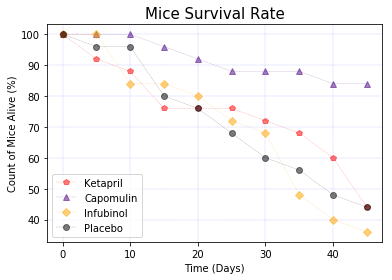

In [15]:
# Mice survival rate across 45 days under each drugs

drug4=['Ketapril', 'Capomulin','Infubinol','Placebo']
survival_plot(drug4[0],marks='p',colors="red")
survival_plot(drug4[1],marks='^',colors="indigo")
survival_plot(drug4[2],marks='D',colors="orange")
survival_plot(drug4[3],marks='o',colors="black")


### Total Tumor Volume Change (%) for Each Drug Across the Full 45 Days.



In [16]:
def tumor_volume_change(drug_name):
    '''
    Formula to calculate the tumor volume change for each treatment
    '''
    #separate the data
    df=merged_selected_df.loc[merged_selected_df["Drug"]==drug_name]
    df_timepoint=df.groupby(["Drug","Timepoint"]).mean() #need to average out the information
    df_timepoint["Tumor Volume Change"]=df_timepoint["Tumor Volume (mm3)"].pct_change().fillna(value=0)
    df_timepoint["Tumor Volume Change %"]=df_timepoint["Tumor Volume Change"]*100
    df_timepoint=df_timepoint.reset_index()
    volume_change_sum=df_timepoint["Tumor Volume Change %"].sum() #find the total volume sum
    return(volume_change_sum)


In [17]:
#summed volume % changes for each drug 

ketapril_total_change=tumor_volume_change(drug4[0])
capomulin_total_change=tumor_volume_change(drug4[1])
infubinol_total_change=tumor_volume_change(drug4[2])
placebo_total_change=tumor_volume_change(drug4[3])

#create dataframe to visualize the information above
total_summed_df= pd.DataFrame({"Drug":["Ketapril","Capomulin","Infubinol","Placebo"],
              "Volume Change %":[ketapril_total_change,capomulin_total_change,
                                 infubinol_total_change,placebo_total_change]})
total_summed_df

,Drug,Volume Change %
0,Ketapril,46.308083
1,Capomulin,-21.391539
2,Infubinol,38.746192
3,Placebo,42.393592


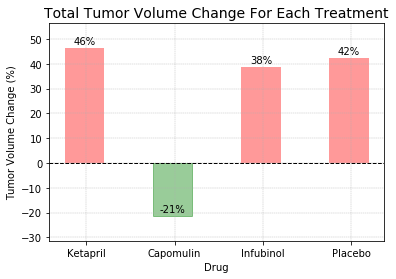

In [18]:
#create the bar graph

xvalues=['Ketapril', 'Capomulin','Infubinol','Placebo']
y_axis=[ketapril_total_change,capomulin_total_change,infubinol_total_change,placebo_total_change]

x_axis=np.arange(0,len(xvalues),1)

width=0.45
fix, ax = plt.subplots()
rects1=ax.bar(x_axis,y_axis,width, color="red",alpha=0.4)
rects1[1].set_color('green')
ax.set_xticks(x_axis + width / 20 )
ax.set_xticklabels((xvalues))
ax.set_title("Total Tumor Volume Change For Each Treatment",size=14)
ax.set_ylabel("Tumor Volume Change (%)")
ax.set_xlabel("Drug")
plt.axhline(0,0,50,color='black',linestyle="dashed",linewidth=1)
plt.ylim(ymin=min(y_axis)-10 , ymax=max(y_axis)+10)
plt.grid(linewidth=0.4,linestyle="dashed")



def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d%%' % int(height),
                ha='center', va='bottom')
         
autolabel(rects1, ax)


Based on the bar chart, capomulin (in green) shows a reduction in total tumor volume while the other treatments has shown an increase of total tumor volume.